In [3]:
# # -*- coding: utf-8 -*-
# """
# Created on Thu Aug 15 11:21:22 2019
# @author: suchismitasa
# """

In [61]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from sklearn.metrics import r2_score

In [4]:
# Data Preprocessing

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.1307,), (0.3081,))])

trainset = tv.datasets.MNIST(root='./data',  train=True,download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False)
testset = tv.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...


/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [5]:
# Defining Model
class Autoencoder(nn.Module):

    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True))

        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,1,kernel_size=5),
            nn.ReLU(True),
            nn.Sigmoid())

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [6]:
from tqdm import trange

In [7]:
# Defining Parameters

num_epochs = 5
batch_size = 128
model = Autoencoder().cpu()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)

for epoch in trange(num_epochs):
    for data in dataloader:
        img, _ = data
        img = Variable(img).cpu()
        # ===================forward=====================
        output = model(img)
        loss = distance(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [01:18<05:15, 78.92s/it]

epoch [1/5], loss:0.9751




 40%|████      | 2/5 [02:54<04:26, 88.88s/it]

epoch [2/5], loss:0.9749




 60%|██████    | 3/5 [04:29<03:03, 91.50s/it]

epoch [3/5], loss:0.9749




 80%|████████  | 4/5 [06:00<01:31, 91.17s/it]

epoch [4/5], loss:0.9749




100%|██████████| 5/5 [07:28<00:00, 89.73s/it]

epoch [5/5], loss:0.9748


In [8]:
for data in dataloader:
    img, _ = data
    img = Variable(img).cpu()
    # ===================forward=====================
    output = model(img)
    break

In [49]:
import matplotlib.pyplot as plt

In [57]:
plotimgout = output.detach().cpu().numpy()

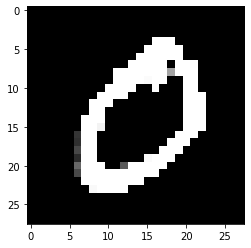

In [58]:
plt.imshow(plotimgout[1][0],cmap='gray')

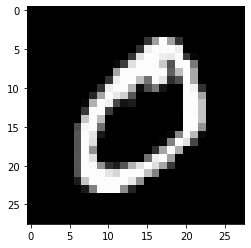

In [59]:
plotimgin = img.detach().cpu().numpy()
plt.imshow(plotimgin[1][0],cmap='gray')

In [62]:
pred = plotimgout[1][0].flatten()
act = plotimgin[1][0].flatten()
r2_score(act, pred)

0.08481274122285742

In [ ]:
for data in dataloader:
    img, _ = data
    img = Variable(img).cpu()
    # ===================forward=====================
    output = model(img)
    break

In [ ]:
batch_size = len(dataloader)

rs = []
for batch in tqdm(dataloader):
    
    # Loading image(s) and
    # reshaping it into a 1-d vector
    img, _ = batch
    img = Variable(img).cpu()

    # Generating output
    output = model(img)
    for i in range(28*28):
        pred = output.detach().cpu().numpy()[:,i]
        act = img.detach().cpu().numpy()[:,i]
        rs.append(r2_score(act,pred.round(2)))
#     break

In [66]:
output.detach().cpu().numpy().shape

(32, 1, 28, 28)

In [75]:
oo = output.detach().cpu().numpy()
oo = oo.reshape(32,784)

In [76]:
ii = img.detach().cpu().numpy()
ii = ii.reshape(32,784)

In [77]:
ii

array([[-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296],
       [-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296],
       [-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296],
       ...,
       [-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296],
       [-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296],
       [-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296]], dtype=float32)